In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
def visual(path):
    sdf = np.load(path)
    sdf = sdf.reshape((64,64))
    plt.imshow(sdf)

In [4]:
sdf_pred = np.load("./chomp256/Reconstructions/350/SDF/data/test/sdf/000010.npy")

In [5]:
sdf_pred = sdf_pred.reshape((64, 64))

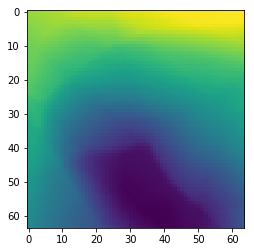

In [6]:
plt.imshow(sdf_pred)

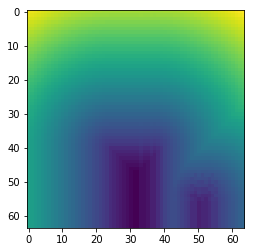

In [7]:
path_true = "./data/random_obstacle/SDF/000010.npy"
visual(path_true)

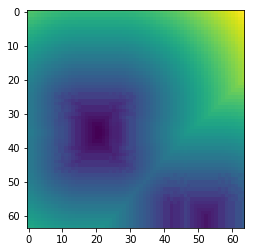

In [8]:
path_true = "./data/random_obstacle/SDF/000005.npy"
visual(path_true)

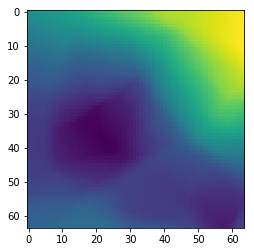

In [11]:
path_pred = "./examples/chomp/Reconstructions/350/SDF/data/test/sdf/000005.npy"
visual(path_pred)

In [12]:
path_true = "./data/random_obstacle/SDF/000010.npy"
sample = np.load(path_true)

In [52]:
from PIL import Image
image = Image.open(img_path)
image.show()

In [53]:
img = np.array(image)

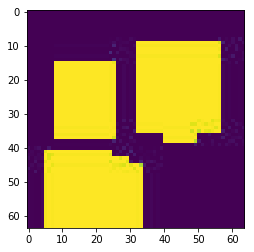

In [54]:
plt.imshow(img)

In [89]:
img_path = "data/random_obstacle/BW/000004.jpg"
img_cv2 = cv2.imread(img_path)
np.unique(img_cv2)
# def generate()
# for k in img_cv2:
#     for i in range(len(k)):
#         if k[i] > 50:
#             k[i] = 255
#         else:
#             k[i] = 0
# img_cv2 = img_cv2//255

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  22,  24,  26,  29,  36, 225, 230,
       232, 237, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255], dtype=uint8)

Sampling start and goal points.

In [87]:
img_cv2.shape

(64, 3)

In [86]:
img == img_cv2

/Users/lastaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [85]:
import random
from math import sqrt

img_path = "data/random_obstacle/BW/000004.jpg"
img = np.array(plt.imread(img_path))
img.shape

for k in img:
    for i in range(len(k)):
        if k[i] > 50:
            k[i] = 255
        else:
            k[i] = 0
img = img//255

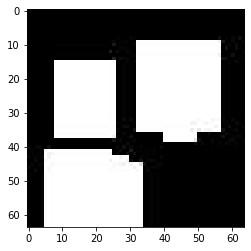

In [90]:
plt.imshow(img_cv2)

In [83]:
# 1) Get all obstacles coordinates (x,y) in the image
obstacle_coords = set()
free_zone = set()
heigth = 64 # the size of the image
width = 64 # the size of the image
for i in range(n):
    for j in range(n):
        if img[i,j] == 0:
            free_zone.add((i,j))
        else:
            obstacle_coords.append()

In [89]:
# 2) Select randomly the start point outside the obstacle zone
start = random.sample(free_zone,1)[0]

In [96]:
# 3) Filtering points at a given distance d
dmin = sqrt((n-1)**2)*0.75
goal = random.sample(free_zone,1)[0]
d0 = np.linalg.norm(np.array(goal) - np.array(start))
d = d0
sample_goal = tuple(goal)
it = 0
l = len(free_zone)
while it < l and d < dmin:
    free_zone.remove(sample_goal)
    sample_goal = random.sample(free_zone,1)[0]
    d = np.linalg.norm(np.array(goal) - np.array(start))
    if d0 < d:
        d0 = d
        goal = sample_goal



In [ ]:
def sample_start_goal(img, d_factor):
    # 1) Get all obstacles coordinates (x,y) in the image
    obstacle_coords = set()
    free_zone = set()
    h = img.shape(0) # heigth of the image
    w = img.shape(1) # width of the image
    for i in range(n):
        for j in range(n):
            if img[i,j] == 0:
                free_zone.add((i,j))
    # 2) Select randomly the start point outside the obstacle zone
    start = random.sample(free_zone,1)[0]
    # 3) Filtering points at a given distance d
    dmin = sqrt((n-1)**2)*d_factor
    goal = random.sample(free_zone,1)[0]
    d0 = np.linalg.norm(np.array(goal) - np.array(start))
    d = d0
    sample_goal = tuple(goal)
    it = 0
    l = len(free_zone)
    while it < l and d < dmin:
        free_zone.remove(sample_goal)
        sample_goal = random.sample(free_zone,1)[0]
        d = np.linalg.norm(np.array(goal) - np.array(start))
        if d0 < d:
            d0 = d
            goal = sample_goal

In [105]:
img_path = "./data/random_obstacle/BW/000004.jpg"


In [109]:
head = os.path.split(img_path)[0]

In [122]:
print(random.sample([5,6,8,4,3],5))

[4, 5, 6, 8, 3]


In [ ]:
# 1) Get all obstacles coordinates (x,y) in the image
obstacle_coords = []
free_zone = set()
heigth = 64 # the size of the image
width = 64 # the size of the image
for i in range(n):
    for j in range(n):
        if img[i,j] == 0:
            free_zone.add((i,j))
        else:
            obstacle_coords.append((i,j))
            
# 2) Select randomly the start point outside the obstacle zone
start = random.sample(free_zone,1)[0]

# 3) Filtering points at a given distance d
dmin = sqrt((n-1)**2)*0.75
goal = random.sample(free_zone,1)[0]
d0 = np.linalg.norm(np.array(goal) - np.array(start))
d = d0
sample_goal = tuple(goal)
it = 0
l = len(free_zone)
while it < l and d < dmin:
    free_zone.remove(sample_goal)
    sample_goal = random.sample(free_zone,1)[0]
    d = np.linalg.norm(np.array(goal) - np.array(start))
    if d0 < d:
        d0 = d
        goal = sample_goal


In [ ]:
def sample_start_goal_obs(img, obstacle_coords):    
    # 2) Select randomly the start point outside the obstacle zone
    obstacles = random.sample(obstacle_coords, len(obstacles_coords))
    start = obstacles[0]
    # 3) Filtering points at a given distance d
    #     dmin = sqrt((n-1)**2)*d_factor
    goal = obstacles[1]
    d = np.linalg.norm(np.array(goal) - np.array(start))
    for k in range(2, len(obstacles)):
        goal_new = obstacles[k]
        d_new = np.linalg.norm(np.array(goal_new) - np.array(start))
        if d < d_new:
            goal = goal_new
            d = d_new
    return start, goal

In [ ]:
obstacles = random.sample(obstacle_coords, len(obstacles_coords))
start = obstacles[0]
# 3) Filtering points at a given distance d
#     dmin = sqrt((n-1)**2)*d_factor
goal = obstacles[1]
d = np.linalg.norm(np.array(goal) - np.array(start))
for k in range(2, len(obstacles)):
    goal_new = obstacles[k]
    d_new = np.linalg.norm(np.array(goal_new) - np.array(start))
    if d < d_new:
        goal = goal_new
        d = d_new

In [ ]:
import random
from math import sqrt

img_path = "data/random_obstacle/BW/000004.jpg"
img = np.array(plt.imread(img_path))
img.shape

for k in img:
    for i in range(len(k)):
        if k[i] > 50:
            k[i] = 255
        else:
            k[i] = 0
img = img//255

In [13]:
def get_zone(img):
    free_zone = []
    obstacle_coords = []
    h = img.shape(0) # heigth of the image
    w = img.shape(1) # width of the image
    for i in range(h):
        for j in range(w):
            if img[i,j] == 0:
                free_zone.append((i,j))
            else:
                obstacle_coords.append((i,j))
    return free_zone, obstacle_coords

In [14]:
import json

In [ ]:
def main(img_folder, output_path):
    img_folder = 'data/random_obstacle/BW'
    filenames = glob(os.path.join(img_folder, '*.json'))
    free_zone_dict = {}
    for img_path in filenames:
        img = np.array(plt.imread(img_path))
        # normalize img
        for k in img:
            for i in range(len(k)):
                if k[i] > 50:
                    k[i] = 255
                else:
                    k[i] = 0
        img = img//255

        # get zones
        free_zone, obstacle_coords = get_zone(img)
        img_name = os.path.split(img_path)[1]
        free_zone_dict[img_name] = free_zone
        # save
        output_path = 'data/random_obstacle/free_zone.json'

    json.dumps(free_zone_dict, output_path)
    print("Saved free zone for {} images".format(len(free_zone_dict)))


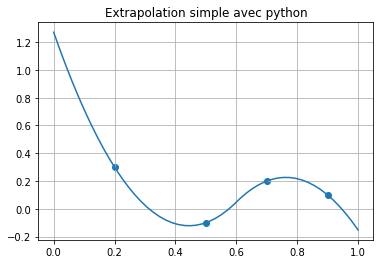

In [32]:
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d, CubicSpline

import matplotlib.pyplot as plt
import numpy as np

xi = np.array([0.2, 0.5, 0.7, 0.9])
yi = np.array([0.3, -0.1, 0.2, 0.1])

plt.figure()

plt.scatter(xi, yi)

x = np.linspace(0, 1.0, 50)

# for order in range(1, 4):
s = InterpolatedUnivariateSpline(xi, yi, k=2)
y = s(x)
plt.plot(x, y)

plt.title("Extrapolation simple avec python")
plt.grid()

plt.show()

In [99]:
file = json.load(open("../traj_autoencoder/data/trajectories_obs_interpolated/000000.json"))

In [100]:
file

{'0': [[1.0, 36.63636363636383],
  [6.555555555555555, 32.595959595959684],
  [12.11111111111111, 28.555555555555586],
  [17.666666666666664, 24.51515151515151],
  [23.22222222222222, 20.474747474747453],
  [28.77777777777778, 16.43434343434344],
  [34.33333333333333, 12.393939393939469],
  [39.888888888888886, 8.35353535353552],
  [45.44444444444444, 4.313131313131592],
  [51.0, 0.2727272727277352]]}

In [101]:
file = np.array(file['0'])

In [102]:
file

array([[ 1.        , 36.63636364],
       [ 6.55555556, 32.5959596 ],
       [12.11111111, 28.55555556],
       [17.66666667, 24.51515152],
       [23.22222222, 20.47474747],
       [28.77777778, 16.43434343],
       [34.33333333, 12.39393939],
       [39.88888889,  8.35353535],
       [45.44444444,  4.31313131],
       [51.        ,  0.27272727]])

In [103]:
x = file[:, 0]
y = file[:, 1]

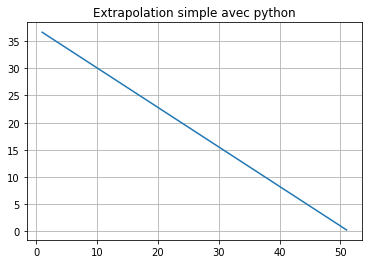

In [104]:
plt.plot(x, y)

plt.title("Extrapolation simple avec python")
plt.grid()

plt.show()

In [65]:
a = plt.imread("data/random_obstacle/BW/000000.jpg")
a.shape
plt.imshow()
plt.plot(x, y)
plt.show()

(64, 64)

In [117]:
a = np.array([[[1, 3], [1, 4], [2, 3]],
              [[5, 3], [2, 3], [0, 1]]])
b = np.array([10,11,12])
b_new = np.broadcast_to(b, (a.shape[0], a.shape[1], b.shape[0]))

In [115]:
c = np.concatenate([b_new, a], axis= -1)

In [116]:
c

array([[[10, 11, 12,  1,  3],
        [10, 11, 12,  1,  4],
        [10, 11, 12,  2,  3]],

       [[10, 11, 12,  5,  3],
        [10, 11, 12,  2,  3],
        [10, 11, 12,  0,  1]]])

In [118]:
b_new

array([[[10, 11, 12],
        [10, 11, 12],
        [10, 11, 12]],

       [[10, 11, 12],
        [10, 11, 12],
        [10, 11, 12]]])

In [112]:
# indices.unsqueeze(-1).repeat(1, num_samp_per_scene).view(-1)

array([1])

In [119]:
b

array([10, 11, 12])

In [120]:
d = np.array([[1,2], [3,4]])

In [122]:
np.expand_dims(d, 1)

array([[[1, 2]],

       [[3, 4]]])

In [123]:
k = (1,2)


In [124]:
a,b =k

In [125]:
a

1

In [126]:
b

2

In [129]:
import torch

In [132]:
x = np.array([[[0, 3], [1,34], [2,4]], [[0,4], [1,4], [2,3]]])
y = x.reshape(x.shape[0], -1)
y

array([[ 0,  3,  1, 34,  2,  4],
       [ 0,  4,  1,  4,  2,  3]])

In [133]:
y.reshape(y.shape[0], -1, 2)

array([[[ 0,  3],
        [ 1, 34],
        [ 2,  4]],

       [[ 0,  4],
        [ 1,  4],
        [ 2,  3]]])

In [142]:
dataset = []
for k in range(3):
    dataset.append(np.array([k, k+1]))
dataset = np.array(dataset)
dataset.shape

(3, 2)

In [138]:
dataset

array([[0, 1],
       [1, 2],
       [2, 3]])

# Data Scaling

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
sdf_path = "./data/random_obstacle/SDF/untitled folder/sdf_labels.npy"
sdf = np.load(sdf_path)

In [163]:
sdf.min()

-27.073972741361768

In [ ]:
def create_sample_position(labels_path, nb_pixel):
    labels = np.load(labels_path)

    scaler = MinMaxScaler((-1, 1))
    labels = labels.reshape((labels.shape[0], -1))
    labels = scaler.fit_transform(labels)
    labels = labels[:, :, np.newaxis]

    coords = np.array([[i, j] for i in range(nb_pixel)
                       for j in range(nb_pixel)])
    coords = (coords - (nb_pixel-1)//2) / ((nb_pixel)//2)

    coords_all = np.repeat(coords[np.newaxis, :, :], labels.shape[0], axis=0)
    dataset = np.concatenate((coords_all, labels), axis=-1)
    dataset = torch.from_numpy(dataset)
    return dataset


In [164]:
scaler = MinMaxScaler((-1, 1))

In [168]:
labels = np.array(sdf)

In [169]:
labels = labels.reshape((labels.shape[0], -1))
sdf = sdf.reshape((sdf.shape[0], -1))


(array([ 30., 136., 174., 254., 198., 104.,  54.,  31.,  13.,   6.]),
 array([-13.        ,  -7.39186815,  -1.78373631,   3.82439554,
          9.43252738,  15.04065923,  20.64879107,  26.25692292,
         31.86505477,  37.47318661,  43.08131846]),
 <a list of 10 Patch objects>)

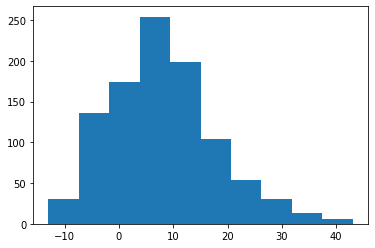

In [178]:
plt.hist(sdf[:, 1000])

In [176]:
labels = scaler.fit_transform(labels)

(array([ 30., 136., 174., 254., 198., 104.,  54.,  31.,  13.,   6.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

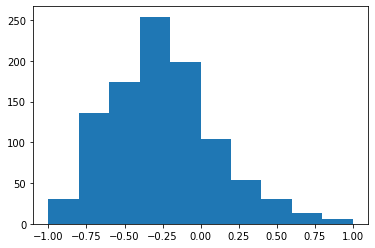

In [179]:
plt.hist(labels[:, 1000])

In [180]:
labels = labels[:, :, np.newaxis]

In [181]:
labels.shape

(1000, 4096, 1)

In [216]:
nb_pixel = 64
coords = np.array([[i, j] for i in range(nb_pixel)
                       for j in range(nb_pixel)])
# coords = (coords - (nb_pixel-1)//2) / ((nb_pixel)//2)


In [217]:
coords

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [63, 61],
       [63, 62],
       [63, 63]])

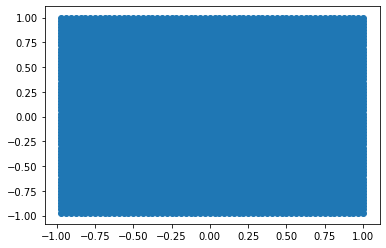

In [194]:
plt.scatter(coords[:,0], coords[:, 1])

In [195]:
coords.shape

(4096, 2)

In [209]:

np.broadcast_to(coords, (labels.shape[0], coords.shape[0], coords.shape[1])).shape

(1000, 4096, 2)

In [210]:
b = a[0] == a[4]
b.all()

True

In [215]:
labels.shape

(1000, 4096, 1)

In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib')

In [16]:
import torch.nn as nn, cv2, torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [31]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 1 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)

In [57]:
f = "./data/random_obstacle/BW/000000.jpg"
I = cv2.imread(f)

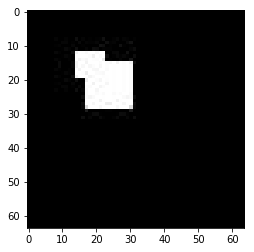

In [58]:
plt.imshow(I)

In [59]:
conv = ConvAutoencoder()

In [60]:
img = torch.from_numpy(I).permute(2, 0, 1).unsqueeze(0).float() /255

In [61]:
img.size()

torch.Size([1, 3, 64, 64])

In [62]:
x = conv.conv1(img)
x = conv.conv2(x)
x = conv.pool(x)

In [63]:
x.shape

torch.Size([1, 4, 32, 32])